In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2021년 1월부터 6월까지 데이터
df1 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202101_202106).csv', encoding='cp949')

# 2021년 7월부터 12월까지 데이터
df2 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202107_202112).csv', encoding='cp949')

# 두 데이터프레임을 병합
df = pd.concat([df1, df2], ignore_index=True)

# 병합된 데이터프레임 출력
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/한국전력공사_전기차충전소충전량(202101_202106).csv'

In [ ]:
df = df.drop('충전기ID', axis=1)
df[['시', '구', '도로명주소']] = df['주소'].str.split(' ', n=2, expand=True)
df.head(3)

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,인천,김포,운양동 전원마을월드2단지,급속01,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44,경기도,김포시,전원로 44
1,인천,시흥,LH퍼스트리움 아파트,완속03,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38,경기도,시흥시,동서로 1068 (조남동)
2,남서울,강남,LH강남힐스테이트,급속01,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33,서울특별시,강남구,자곡동 자곡로3길 21


In [ ]:
gwangju = df[df['시'] == '광주광역시']
gwangju = gwangju.drop_duplicates().reset_index(drop=True)
gwangju

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,광주전남,광산,수완 우미린 1차아파트,완속02,"광주광역시 광산구 수완로33번길 22 (수완동, 수완1차우미린아파트)",완속,7.0,29.9500,5,10,2021-01-01,2021-01-01 18:44:57,2021-01-01 23:54:58,광주광역시,광산구,"수완로33번길 22 (수완동, 수완1차우미린아파트)"
1,광주전남,광주전남직할,장등공용차고지,급속03,광주광역시 북구 장운길 55 (장등동),급속,200.0,14.3105,0,17,2021-01-01,2021-01-01 22:05:59,2021-01-01 22:23:37,광주광역시,북구,장운길 55 (장등동)
2,광주전남,서광주,보훈병원 주차장,급속01,"광주광역시 남구 서문대로824번길 10 (주월동, (구)광주보훈병원)",급속,50.0,27.3800,1,41,2021-01-01,2021-01-01 18:42:59,2021-01-01 20:24:58,광주광역시,남구,"서문대로824번길 10 (주월동, (구)광주보훈병원)"
3,광주전남,광주전남직할,장등공용차고지,급속04,광주광역시 북구 장운길 55 (장등동),급속,200.0,65.2295,0,40,2021-01-01,2021-01-01 21:46:13,2021-01-01 22:26:25,광주광역시,북구,장운길 55 (장등동)
4,광주전남,광주전남직할,일곡롯데아파트,완속02,"광주광역시 북구 설죽로 595 (일곡동, 롯데아파트)",완속,7.0,20.4300,3,46,2021-01-01,2021-01-01 19:52:29,2021-01-01 23:38:58,광주광역시,북구,"설죽로 595 (일곡동, 롯데아파트)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78656,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,35.5500,0,40,2021-10-17,2021-10-17 11:22:58,2021-10-17 12:03:47,광주광역시,서구,불암길 154 (매월동)
78657,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,28.4900,0,17,2021-10-17,2021-10-17 11:55:10,2021-10-17 12:12:11,광주광역시,북구,장운길 55 (장등동)
78658,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,68.7800,2,14,2021-10-17,2021-10-17 10:19:13,2021-10-17 12:33:33,광주광역시,광산구,"장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)"
78659,광주전남,서광주,매월동 전기버스 충전소,급속02,광주광역시 서구 불암길 154 (매월동),급속,200.0,50.9900,0,59,2021-10-17,2021-10-17 07:22:48,2021-10-17 08:22:10,광주광역시,서구,불암길 154 (매월동)


In [ ]:
# gwangju.to_csv('2021년1월부터10월까지광주데이터.csv', encoding='cp949')

<AxesSubplot:xlabel='구', ylabel='충전량'>

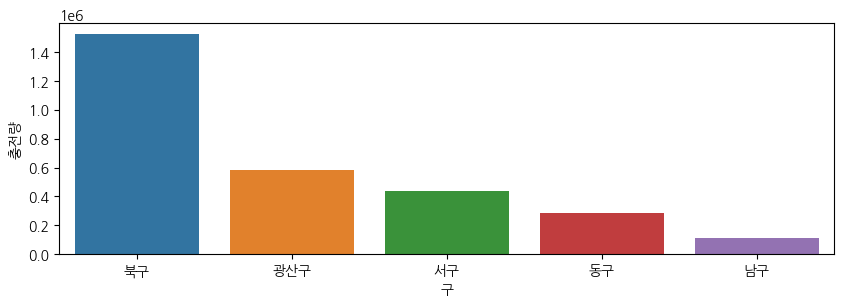

In [ ]:
# 구별 충전량
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)
gwangju_gu = gwangju_gu.reset_index()
gwangju_gu
plt.figure(figsize=(10,3))
sns.barplot(data=gwangju_gu,x='구',y='충전량')

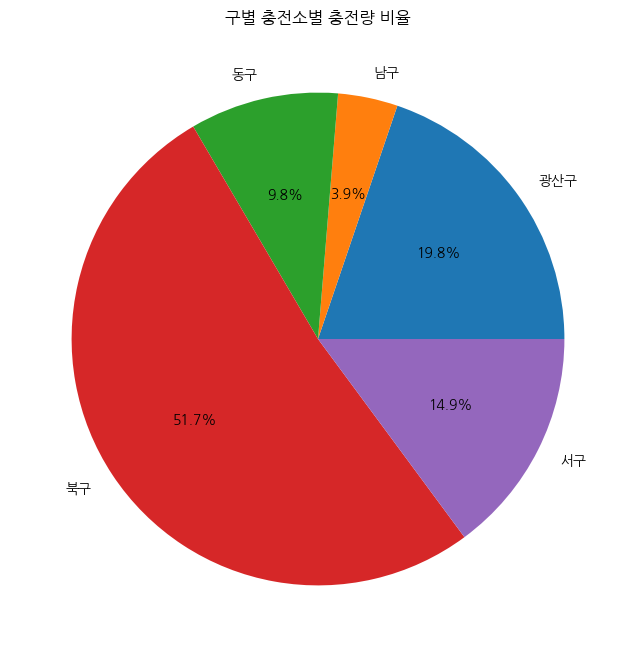

In [ ]:
# 구별 충전량 비율
df_charge = gwangju[['구', '충전량']]
df_charge_sum = df_charge.groupby('구').sum()

df_charge_sum.plot(kind='pie', y='충전량', legend=False, autopct='%1.1f%%', figsize=(8,8))
plt.title('구별 충전소별 충전량 비율')
plt.ylabel('')
plt.show()

In [ ]:
# 시간별 구별 총충전량
gwangju['충전시작시각'] = pd.to_datetime(gwangju['충전시작시각'])

# 시간별, 구별 충전량 계산
hourcharge = gwangju.groupby([gwangju['충전시작시각'].dt.hour, gwangju['구']])['충전량'].sum()

hourcharge_df = pd.DataFrame({'시간': [i[0] for i in hourcharge.index],
                                       '구': [i[1] for i in hourcharge.index],
                                       '충전량': hourcharge.values})
hourcharge_df

,시간,구,충전량
0,0,광산구,7683.4170
1,0,남구,3031.3700
2,0,동구,1123.4200
3,0,북구,4641.7784
4,0,서구,3689.7190
...,...,...,...
115,23,광산구,14745.2238
116,23,남구,10170.0600
117,23,동구,2388.6500
118,23,북구,67200.2110


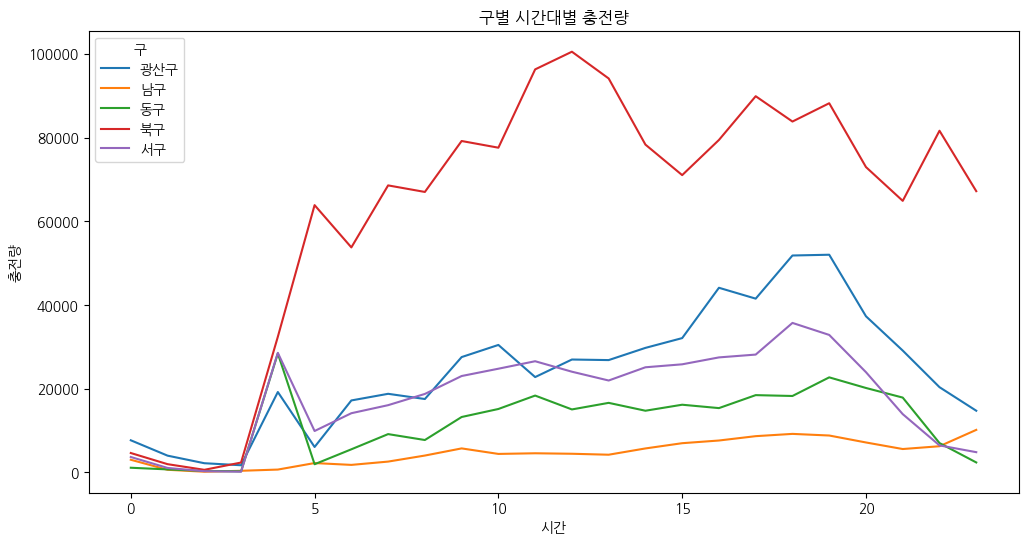

In [ ]:
mart_hourly_pivot = hourcharge_df.pivot_table(values='충전량', index='시간', columns='구', aggfunc='sum')

mart_hourly_pivot.plot(kind='line', figsize=(12,6))
plt.xlabel('시간')
plt.ylabel('충전량')
plt.title('구별 시간대별 충전량')
plt.show()

<Figure size 1200x800 with 0 Axes>

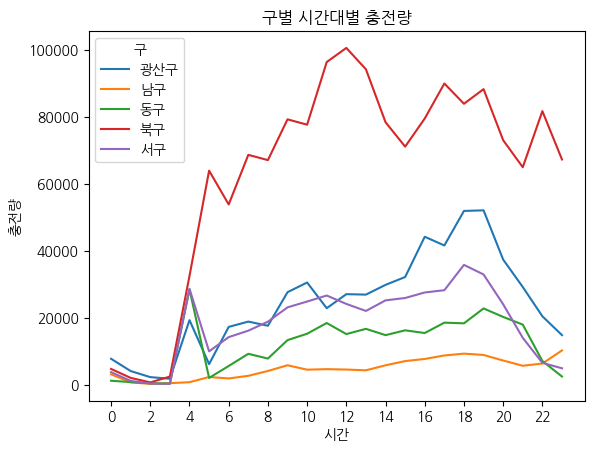

In [ ]:
mart_hourly_pivot = hourcharge_df.pivot_table(values='충전량', index='시간', columns='구', aggfunc='sum')

plt.figure(figsize=(12, 8))
ax = mart_hourly_pivot.plot(kind='line')
ax.set_xticks(range(0, 24, 2))  # 2시간 간격으로 눈금 표시
plt.xlabel('시간')
plt.ylabel('충전량')
plt.title('구별 시간대별 충전량')

plt.show()

In [ ]:
# 구별충전량
gu_charge = gwangju.groupby([gwangju['충전종료일자'], gwangju['구']])['충전량'].sum()
gu_charge

충전종료일자      구  
2021-01-01  광산구    2340.6109
            남구      687.8100
            동구     1493.4289
            북구     6741.4101
            서구     1575.4360
                     ...    
2021-10-17  광산구    2367.1260
            남구      460.4400
            동구     1010.5000
            북구     5254.7100
            서구     1719.7600
Name: 충전량, Length: 1220, dtype: float64

In [ ]:
# 충전시간별 충전소명 충전량
gu_charge_df = pd.DataFrame({'충전종료일자': [i[0] for i in gu_charge.index],
                                       '구': [i[1] for i in gu_charge.index],
                                       '충전량': gu_charge.values})
gu_charge_df

,충전종료일자,구,충전량
0,2021-01-01,광산구,2340.6109
1,2021-01-01,남구,687.8100
2,2021-01-01,동구,1493.4289
3,2021-01-01,북구,6741.4101
4,2021-01-01,서구,1575.4360
...,...,...,...
1215,2021-10-17,광산구,2367.1260
1216,2021-10-17,남구,460.4400
1217,2021-10-17,동구,1010.5000
1218,2021-10-17,북구,5254.7100


In [ ]:
gu_charge_df['충전종료일자'] = pd.to_datetime(gu_charge_df['충전종료일자'])
# '월' column 추가
gu_charge_df['월'] = gu_charge_df['충전종료일자'].dt.month

# 월별로 데이터프레임 분할
gu_charge_by_month = [gu_charge_df.loc[gu_charge_df['월'] == i] for i in range(1, 11)]
gu_charge_by_month

[        충전종료일자    구        충전량  월
 0   2021-01-01  광산구  2340.6109  1
 1   2021-01-01   남구   687.8100  1
 2   2021-01-01   동구  1493.4289  1
 3   2021-01-01   북구  6741.4101  1
 4   2021-01-01   서구  1575.4360  1
 ..         ...  ...        ... ..
 150 2021-01-31  광산구  1897.3977  1
 151 2021-01-31   남구   586.7800  1
 152 2021-01-31   동구  1322.0971  1
 153 2021-01-31   북구  5394.5612  1
 154 2021-01-31   서구  1761.3820  1
 
 [155 rows x 4 columns],
         충전종료일자    구        충전량  월
 155 2021-02-01  광산구  1576.0621  2
 156 2021-02-01   남구   403.9700  2
 157 2021-02-01   동구  1473.3579  2
 158 2021-02-01   북구  4919.9432  2
 159 2021-02-01   서구  1750.2300  2
 ..         ...  ...        ... ..
 290 2021-02-28  광산구  1684.1553  2
 291 2021-02-28   남구   544.0200  2
 292 2021-02-28   동구  1175.2944  2
 293 2021-02-28   북구  5733.8728  2
 294 2021-02-28   서구  1561.0200  2
 
 [140 rows x 4 columns],
         충전종료일자    구        충전량  월
 295 2021-03-01  광산구  1971.6537  3
 296 2021-03-01   남구   308.1000  3
 

In [ ]:
# 일자별 총충전량
gwangju['충전종료일자'] = pd.to_datetime(gwangju['충전종료일자'])

# 일자별, 시간대별 충전량 계산
daily_hourly_charge = gwangju.groupby([gwangju['충전종료일자'].dt.date, gwangju['구']])['충전량'].sum()

# 일자 컬럼 추가
daily_hourly_charge_df = pd.DataFrame({'일자': [i[0] for i in daily_hourly_charge.index],
                                       '구': [i[1] for i in daily_hourly_charge.index],
                                       '충전량': daily_hourly_charge.values})

# 월별 컬럼 추가
daily_hourly_charge_df['월'] = daily_hourly_charge_df['일자'].apply(lambda x: x.month)

# 월별 컬럼에 일자별 충전량 매핑
monthly_charge = daily_hourly_charge_df.groupby(['월', '구'])['충전량'].sum().unstack()

monthly_charge
# 월별 구별 총충전량

구,광산구,남구,동구,북구,서구
월,,,,,
1,78534.2958,13575.39,42836.7533,209974.4091,56789.580
2,57345.3260,13108.25,37168.4240,177832.5147,50526.030
3,61967.6272,15268.89,35947.3321,186133.9058,54902.292
4,61060.8065,13780.05,30558.7924,169055.4662,49813.840
5,29575.8884,5260.19,15064.4584,81796.5595,24457.560
7,82311.5086,18543.58,37721.7499,212763.2883,58839.817
8,83149.7335,15974.56,35708.2000,198688.1689,57510.343
9,80935.2428,12257.41,32595.4375,182617.3693,53021.389
10,47088.8510,7525.88,19389.1300,101491.0970,31629.893


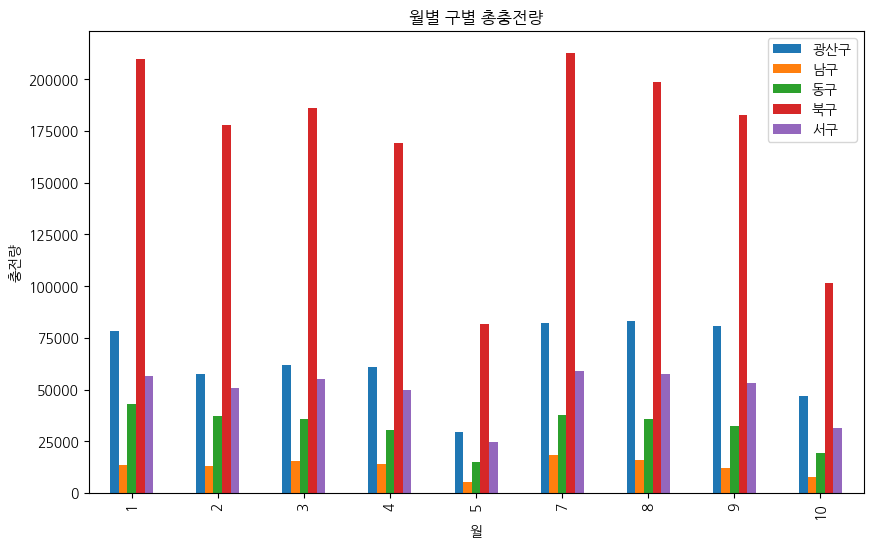

In [ ]:
monthly_charge.plot(kind='bar', figsize=(10, 6))
plt.title('월별 구별 총충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.legend(loc='best')
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("구별 총 충전량 비율", "구별 총 충전량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 'gwangju' 데이터프레임에서 '구'별 '충전량' 합계를 계산합니다.
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)

# 'gwangju_gu' 데이터프레임을 subfig에 추가합니다.
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)

bar_trace = go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False,
                   marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']))
subfig.add_trace(bar_trace, 1, 2)

subfig.update_layout(template="plotly_dark", title='구별 총 충전량')
subfig.show()

In [ ]:
# '충전소명' 열에서 '롯데마트 첨단점 옥상(지상2층)주차장'을 '롯데마트 첨단점'으로 변경합니다.
gwangju['충전소명'] = gwangju['충전소명'].replace('롯데마트 첨단점 옥상(지상2층)주차장', '롯데마트 첨단점')

In [ ]:
mart = gwangju[gwangju['충전소명'].str.contains('마트|홈플러스|신세계')]
mart

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
42,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,13.48,0,29,2021-01-01,2021-01-01 21:27:55,2021-01-01 21:57:00,광주광역시,광산구,용아로 390 (하남동)
85,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,19.35,0,54,2021-01-01,2021-01-01 17:48:32,2021-01-01 18:43:27,광주광역시,광산구,용아로 390 (하남동)
98,광주전남,광주전남직할,홈플러스 동광주점,급속01,"광주광역시 북구 동문대로 200 (두암동, 삼성홈플러스)",급속,50.0,15.05,1,30,2021-01-01,2021-01-01 15:07:37,2021-01-01 16:38:20,광주광역시,북구,"동문대로 200 (두암동, 삼성홈플러스)"
104,광주전남,광주전남직할,이마트 동광주점,급속01,"광주광역시 동구 중앙로 358 (계림동, 금호계림주상복합)",급속,50.0,30.12,0,41,2021-01-01,2021-01-01 14:37:08,2021-01-01 15:18:32,광주광역시,동구,"중앙로 358 (계림동, 금호계림주상복합)"
112,광주전남,광주전남직할,이마트 동광주점,급속01,"광주광역시 동구 중앙로 358 (계림동, 금호계림주상복합)",급속,50.0,16.74,0,45,2021-01-01,2021-01-01 16:49:51,2021-01-01 17:35:32,광주광역시,동구,"중앙로 358 (계림동, 금호계림주상복합)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78560,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,51.21,1,12,2021-10-17,2021-10-17 21:22:28,2021-10-17 22:34:42,광주광역시,광산구,용아로 390 (하남동)
78561,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,3.41,0,4,2021-10-17,2021-10-17 12:37:57,2021-10-17 12:42:34,광주광역시,광산구,용아로 390 (하남동)
78562,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,17.07,0,22,2021-10-17,2021-10-17 12:46:09,2021-10-17 13:08:42,광주광역시,광산구,용아로 390 (하남동)
78601,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,14.01,0,22,2021-10-17,2021-10-17 18:23:22,2021-10-17 18:46:13,광주광역시,광산구,용아로 390 (하남동)


In [ ]:
mart['충전소명'].value_counts()

홈플러스 동광주점     571
홈플러스 광주계림점    563
홈플러스 광주하남점    543
이마트 동광주점      205
롯데마트 상무점       47
롯데마트 첨단점       27
롯데마트 월드컵점      26
이마트 광산점        21
롯데마트 수완점       13
Name: 충전소명, dtype: int64

In [ ]:
mart_time_charge = mart.groupby([mart['충전시작시각'], mart['충전소명']])['충전량'].sum()
mart_time_charge

충전시작시각               충전소명      
2021-01-01 10:53:26  홈플러스 광주하남점    13.36
2021-01-01 11:28:04  이마트 동광주점      15.46
2021-01-01 11:57:36  홈플러스 광주하남점    21.79
2021-01-01 12:11:47  이마트 동광주점       4.41
2021-01-01 14:37:08  이마트 동광주점      30.12
                                   ...  
2021-10-17 13:53:52  홈플러스 광주하남점     5.86
2021-10-17 18:23:22  홈플러스 광주하남점    14.01
2021-10-17 19:31:02  홈플러스 동광주점     18.28
2021-10-17 20:15:55  홈플러스 동광주점     35.70
2021-10-17 21:22:28  홈플러스 광주하남점    51.21
Name: 충전량, Length: 2016, dtype: float64

In [ ]:
# 충전시간별 충전소명 충전량
mart_time_charge_df = pd.DataFrame({'충전시간': [i[0] for i in mart_time_charge.index],
                                       '충전소명': [i[1] for i in mart_time_charge.index],
                                       '충전량': mart_time_charge.values})
mart_time_charge_df

,충전시간,충전소명,충전량
0,2021-01-01 10:53:26,홈플러스 광주하남점,13.36
1,2021-01-01 11:28:04,이마트 동광주점,15.46
2,2021-01-01 11:57:36,홈플러스 광주하남점,21.79
3,2021-01-01 12:11:47,이마트 동광주점,4.41
4,2021-01-01 14:37:08,이마트 동광주점,30.12
...,...,...,...
2011,2021-10-17 13:53:52,홈플러스 광주하남점,5.86
2012,2021-10-17 18:23:22,홈플러스 광주하남점,14.01
2013,2021-10-17 19:31:02,홈플러스 동광주점,18.28
2014,2021-10-17 20:15:55,홈플러스 동광주점,35.70


In [ ]:
# 마트별 시간대별 충전량
mart_time_charge_df['hour'] = mart_time_charge_df['충전시간'].dt.hour
mart_hourly_charge = mart_time_charge_df.groupby(['충전소명', 'hour'])['충전량'].sum().reset_index()

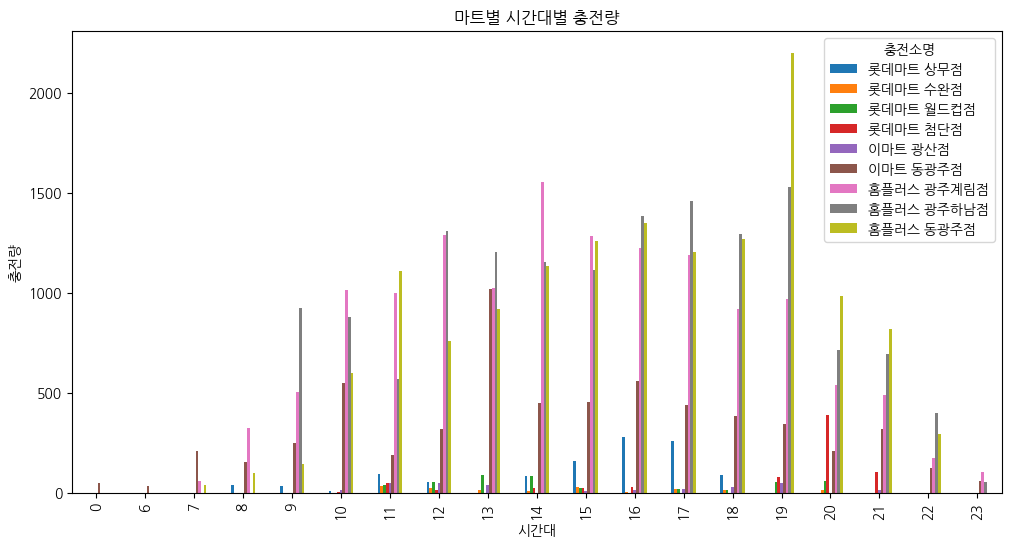

In [ ]:
mart_hourly_pivot = mart_hourly_charge.pivot_table(values='충전량', index='hour', columns='충전소명', aggfunc='sum')
mart_hourly_pivot.plot(kind='bar', figsize=(12,6))
plt.xlabel('시간대')
plt.ylabel('충전량')
plt.title('마트별 시간대별 충전량')
plt.show()

In [ ]:
mart_hourly_charge

,충전소명,hour,충전량
0,롯데마트 상무점,8,37.63
1,롯데마트 상무점,9,32.41
2,롯데마트 상무점,10,7.72
3,롯데마트 상무점,11,96.81
4,롯데마트 상무점,12,52.88
...,...,...,...
109,홈플러스 동광주점,18,1270.71
110,홈플러스 동광주점,19,2197.85
111,홈플러스 동광주점,20,985.32
112,홈플러스 동광주점,21,818.92


In [ ]:
# 마트별월충전량
mart_month_charge = mart.groupby([mart['충전종료일자'], mart['충전소명']])['충전량'].sum()
# 충전시간별 충전소명 충전량
mart_month_charge_df = pd.DataFrame({'충전날짜': [i[0] for i in mart_month_charge.index],
                                       '충전소명': [i[1] for i in mart_month_charge.index],
                                       '충전량': mart_month_charge.values})
mart_month_charge_df

,충전날짜,충전소명,충전량
0,2021-01-01,이마트 동광주점,77.54
1,2021-01-01,홈플러스 광주하남점,67.98
2,2021-01-01,홈플러스 동광주점,15.05
3,2021-01-02,이마트 동광주점,136.47
4,2021-01-02,홈플러스 광주하남점,38.60
...,...,...,...
832,2021-10-16,홈플러스 광주계림점,31.54
833,2021-10-16,홈플러스 광주하남점,41.37
834,2021-10-16,홈플러스 동광주점,122.66
835,2021-10-17,홈플러스 광주하남점,108.63


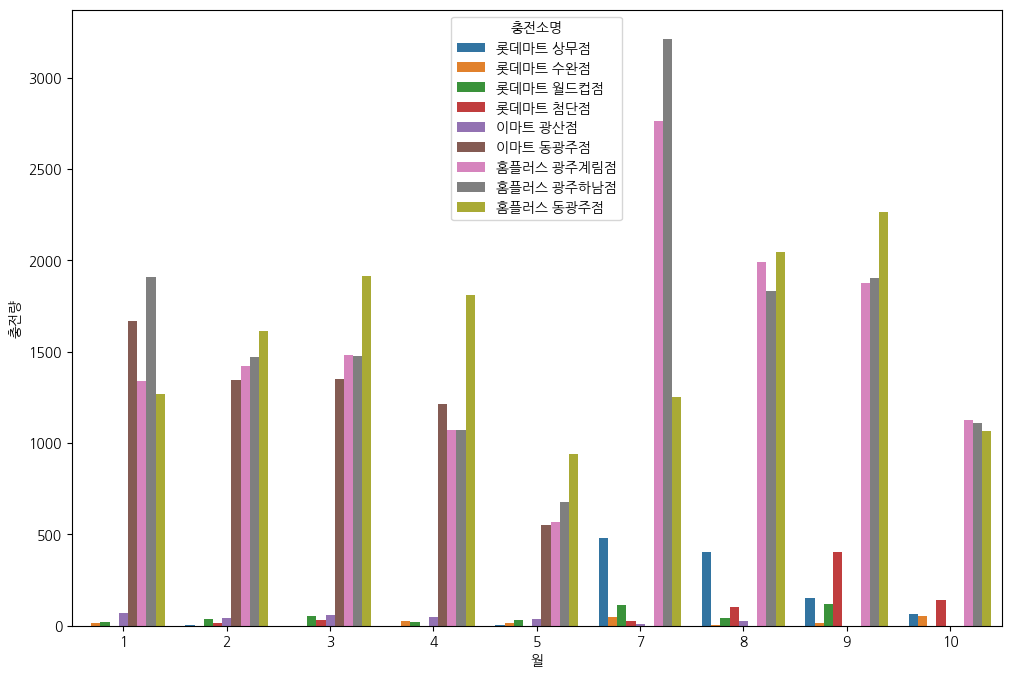

In [ ]:
# 마트별 월충전량
mart_month_charge_df['월'] = pd.to_datetime(mart_month_charge_df['충전날짜']).dt.month
mart_monthly_charge = mart_month_charge_df.groupby(['충전소명', '월'])['충전량'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=mart_monthly_charge, x='월', y='충전량', hue='충전소명')
plt.show()

In [ ]:
# mart_month_charge_df.to_csv('2021년1월부터10월까지 마트별충전량.csv', encoding='cp949')

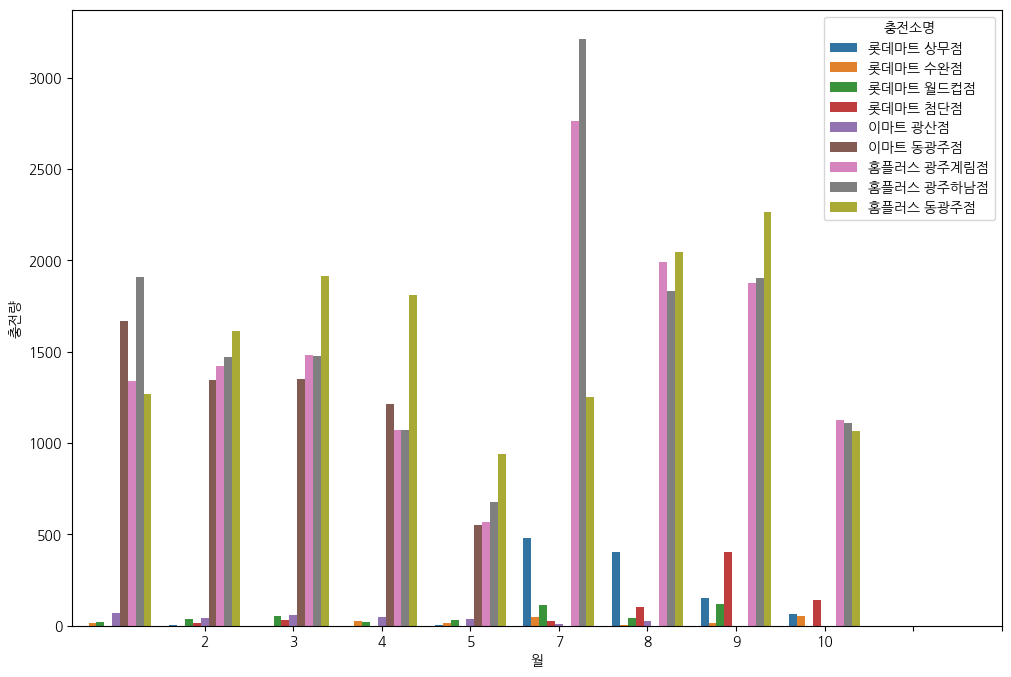

In [ ]:
# 마트별 월충전량
mart_month_charge_df['월'] = pd.to_datetime(mart_month_charge_df['충전날짜']).dt.month
mart_monthly_charge = mart_month_charge_df.groupby(['충전소명', '월'])['충전량'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=mart_monthly_charge, x='월', y='충전량', hue='충전소명')

# xticks 설정
plt.xticks(range(1, 11))  # 1월부터 10월까지 눈금 표시

plt.show()

In [ ]:
monthly_charge

구,광산구,남구,동구,북구,서구
월,,,,,
1,78534.2958,13575.39,42836.7533,209974.4091,56789.580
2,57345.3260,13108.25,37168.4240,177832.5147,50526.030
3,61967.6272,15268.89,35947.3321,186133.9058,54902.292
4,61060.8065,13780.05,30558.7924,169055.4662,49813.840
5,29575.8884,5260.19,15064.4584,81796.5595,24457.560
7,82311.5086,18543.58,37721.7499,212763.2883,58839.817
8,83149.7335,15974.56,35708.2000,198688.1689,57510.343
9,80935.2428,12257.41,32595.4375,182617.3693,53021.389
10,47088.8510,7525.88,19389.1300,101491.0970,31629.893
